In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [2]:
df = pd.read_csv("telco.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [4]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [5]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
num_cols = []
categorical_cols = []

In [7]:
def sort_cols(data):


    for i in data.columns:
        if data[i].dtypes == "object":
            categorical_cols.append(i)
        else :
            num_cols.append(i)

In [8]:
sort_cols(df)

In [9]:
def fix_cat_cols(data,cat_columns):
    for i in cat_columns:
        data[i] = data[i].fillna(data[i].mode()[0])

In [10]:
fix_cat_cols(df,categorical_cols)

In [11]:
def fix_num_cols(data,num_columns):
    for i in num_columns:
        data[i] = data[i].fillna(data[i].mean())

In [12]:
fix_num_cols(df,num_cols)

In [13]:
needed_cols = ['Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)']

In [14]:
df.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [15]:
for _ in needed_cols:
    Q1 = df[_].quantile(0.25)
    Q3 = df[_].quantile(0.75)
    IQR = Q1 - Q3
    print(Q1 - 1.5 * IQR)
    print(Q3 + 1.5 * IQR)
    
    print(f'the skewness is {df[_].skew()}')
    print('_________________________________________________')

147.1935590806404
-2.397853026880128
the skewness is 69.70516144217078
_________________________________________________
24.99432436635049
-4.331441455450165
the skewness is 31.530109163958414
_________________________________________________
29543.5
-9790.5
the skewness is 2.58944528135974
_________________________________________________
1656.5
-489.5
the skewness is 4.50342771125827
_________________________________________________
30548405.40551289
-8405559.135170963
the skewness is 24.840676567384854
_________________________________________________
1107983.497216599
-285315.83240553306
the skewness is 141.03568418713485
_________________________________________________


In [16]:
for _ in needed_cols:
    Q1 = df[_].quantile(0.25)
    Q3 = df[_].quantile(0.75)
    IQR = Q1 - Q3
    df[_] = np.where(df[_] < Q1 - 1.5 * IQR, df[_].mean(), df[_] )
    df[_] = np.where(df[_] > Q3 - 1.5 * IQR, df[_].mean(), df[_] )
    print(df[_].skew())

3.8393826668361446
2.9992848178475784
2.6404715453138103
1.8691868667041291
9.258979055345582
13.021441390853878


In [17]:
df['AVG RTT (ms)'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']
df['Avg Bearer TP (kbps)'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']
df['TCP Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']


In [18]:
scaler = StandardScaler()
cols_scaled = ['AVG RTT (ms)','Avg Bearer TP (kbps)','TCP Retrans. Vol (Bytes)']

In [19]:
df[cols_scaled] = scaler.fit_transform(df[cols_scaled])

In [20]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),AVG RTT (ms),Avg Bearer TP (kbps),TCP Retrans. Vol (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,114.099805,19.007464,16445.605027,...,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,-1.496867e-17,-6.821165e-16,-2.569874e-15
std,2.883600e+18,288.610872,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,15.399770,3.808036,7798.325717,...,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08,1.000003e+00,1.000003e+00,1.000003e+00
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,109.795706,17.662883,13300.045927,...,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,-3.480973e-01,-4.318760e-01,-1.405302e-01
25%,7.349883e+18,250.000000,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,109.795706,17.662883,13300.045927,...,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08,-3.480973e-01,-4.176912e-01,-1.405302e-01
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366380e+10,3.572241e+13,109.795706,17.662883,13300.045927,...,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08,-3.480973e-01,-4.176912e-01,-1.405302e-01
75%,1.304243e+19,749.000000,750.000000,1.324300e+05,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,13300.045927,...,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08,-3.480973e-01,-4.143683e-01,-1.405302e-01
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,221.000000,39.000000,49205.000000,...,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,7.819705e+00,4.225173e+00,1.549070e+01


In [21]:
TCP_per_user = df.groupby('TCP Retrans. Vol (Bytes)').agg({'MSISDN/Number':'count'}).reset_index()

In [22]:
RTT_per_user = df.groupby('AVG RTT (ms)').agg({'MSISDN/Number':'count'}).reset_index()

In [23]:
Handset_per_user = df.groupby('Handset Type').agg({'MSISDN/Number':'count'}).reset_index()

In [24]:
TP_per_user = df.groupby('Avg Bearer TP (kbps)').agg({'MSISDN/Number':'count'}).reset_index()

In [25]:
TCP_per_user

,TCP Retrans. Vol (Bytes),MSISDN/Number
0,-0.140530,144912
1,-0.019378,858
2,0.040397,1
3,0.040651,1
4,0.041082,1
...,...,...
1845,14.995180,1
1846,15.003710,1
1847,15.004123,1
1848,15.021870,1


In [26]:
RTT_per_user

,AVG RTT (ms),MSISDN/Number
0,-0.348097,121960
1,0.104049,873
2,0.133676,7526
3,0.165674,828
4,0.227298,725
...,...,...
263,7.511582,4
264,7.573207,1
265,7.696456,3
266,7.758080,1


In [27]:
Handset_per_user

,Handset Type,MSISDN/Number
0,A-Link Telecom I. Cubot A5,1
1,A-Link Telecom I. Cubot Note Plus,1
2,A-Link Telecom I. Cubot Note S,1
3,A-Link Telecom I. Cubot Nova,1
4,A-Link Telecom I. Cubot Power,1
...,...,...
1391,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,2
1392,Zyxel Communicat. Lte7460,1
1393,Zyxel Communicat. Sbg3600,1
1394,Zyxel Communicat. Zyxel Wah7706,1


In [28]:
TP_per_user

,Avg Bearer TP (kbps),MSISDN/Number
0,-0.431876,9
1,-0.431751,7
2,-0.431626,3
3,-0.431501,1
4,-0.431376,2
...,...,...
14628,4.223672,1
14629,4.224298,1
14630,4.224548,2
14631,4.224798,1


In [29]:
new_needed_cols = ['AVG RTT (ms)','Avg Bearer TP (kbps)','TCP Retrans. Vol (Bytes)']

In [30]:
for i in new_needed_cols:
    print(f'For col {i}')
    print(df[i].sort_values()[:10])
    print(df[i].sort_values()[-10:])
    print(df[i].value_counts().nlargest(10))
    print('_____________________________________________________')

For col AVG RTT (ms)
0       -0.348097
95517   -0.348097
95516   -0.348097
95515   -0.348097
95514   -0.348097
95513   -0.348097
95512   -0.348097
95509   -0.348097
95508   -0.348097
95507   -0.348097
Name: AVG RTT (ms), dtype: float64
65745     7.511582
66074     7.511582
60428     7.511582
36850     7.511582
764       7.573207
68300     7.696456
117962    7.696456
28438     7.696456
141222    7.758080
134502    7.819705
Name: AVG RTT (ms), dtype: float64
-0.348097    121960
 0.133676      7526
 2.407136      6009
 0.104049       873
 2.888910       841
 0.165674       828
 0.227298       725
 0.288923       685
 0.350547       672
 0.412172       624
Name: AVG RTT (ms), dtype: int64
_____________________________________________________
For col Avg Bearer TP (kbps)
21093    -0.431876
39596    -0.431876
2066     -0.431876
14083    -0.431876
120755   -0.431876
60461    -0.431876
85021    -0.431876
1506     -0.431876
11300    -0.431876
24164    -0.431751
Name: Avg Bearer TP (kbps), dtype

In [31]:
df['AVG_TP_per_Handset'] = df.groupby("Avg Bearer TP (kbps)")["Handset Type"].transform('count')

<AxesSubplot:xlabel='AVG_TP_per_Handset', ylabel='Density'>

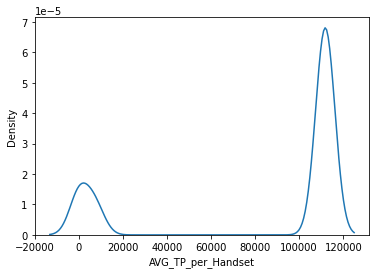

In [32]:
sns.kdeplot(data = df, x = 'AVG_TP_per_Handset')

In [33]:
AVG_TCP_RTN_per_Handset = df.groupby("Handset Type").agg({"TCP Retrans. Vol (Bytes)":"sum"})

<AxesSubplot:xlabel='TCP Retrans. Vol (Bytes)', ylabel='Density'>

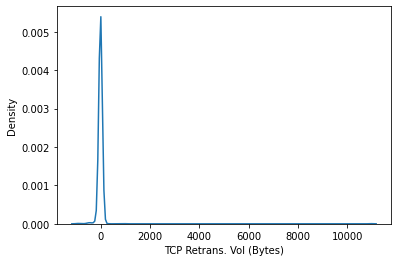

In [34]:
sns.kdeplot(data = AVG_TCP_RTN_per_Handset, x = "TCP Retrans. Vol (Bytes)")

In [36]:
kmeans = KMeans(
    init= "random",
    n_clusters = 3,
    n_init= 10,
    max_iter= 300,
    random_state= 42
)

In [40]:
X = df[['AVG RTT (ms)','Avg Bearer TP (kbps)','TCP Retrans. Vol (Bytes)']]

In [41]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3, random_state=42)

In [42]:
X['labels'] = kmeans.labels_

C:\Users\CLASSISH\AppData\Local\Temp/ipykernel_10200/3168574615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['labels'] = kmeans.labels_


In [44]:
X['labels'].value_counts()

1    123247
0     15296
2     11458
Name: labels, dtype: int64

In [47]:
X1 = X[X.labels==1]

In [48]:
X1.describe()

,AVG RTT (ms),Avg Bearer TP (kbps),TCP Retrans. Vol (Bytes),labels
count,123247.000000,123247.000000,123247.000000,123247.0
mean,-0.291284,-0.311683,-0.124943,1.0
std,0.197331,0.309406,0.230470,0.0
min,-0.348097,-0.431876,-0.140530,1.0
25%,-0.348097,-0.417691,-0.140530,1.0
50%,-0.348097,-0.417691,-0.140530,1.0
75%,-0.348097,-0.417691,-0.140530,1.0
max,0.966793,0.712064,5.074489,1.0


In [49]:
X0 = X[X.labels==0]

In [51]:
X0.describe()

,AVG RTT (ms),Avg Bearer TP (kbps),TCP Retrans. Vol (Bytes),labels
count,15296.000000,15296.000000,15296.000000,15296.0
mean,-0.008230,2.613968,0.855927,0.0
std,0.639298,0.988375,2.642073,0.0
min,-0.348097,-0.431751,-0.140530,0.0
25%,-0.348097,2.046540,-0.140530,0.0
50%,-0.348097,2.675430,-0.140530,0.0
75%,0.133676,3.383327,-0.140530,0.0
max,6.073443,4.225173,15.490698,0.0


In [52]:
X2 = X[X.labels==2]

In [53]:
X2.describe()

,AVG RTT (ms),Avg Bearer TP (kbps),TCP Retrans. Vol (Bytes),labels
count,11458.000000,11458.000000,11458.000000,11458.0
mean,3.144156,-0.136959,0.201306,2.0
std,1.152663,0.756578,1.419719,0.0
min,2.006224,-0.431876,-0.140530,2.0
25%,2.407136,-0.417691,-0.140530,2.0
50%,2.407136,-0.417691,-0.140530,2.0
75%,3.473990,-0.327737,-0.140530,2.0
max,7.819705,4.204164,14.813455,2.0
